In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review 

- Located at https://pollev.com/jeremysanchez

## New material

### Jury selection in Alameda County

*The ACLU compiled data on the composition of the jury panels in 11 felony trials in Alameda County in the years 2009 and 2010. In those panels, the total number of people who reported for jury service was 1453.*

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


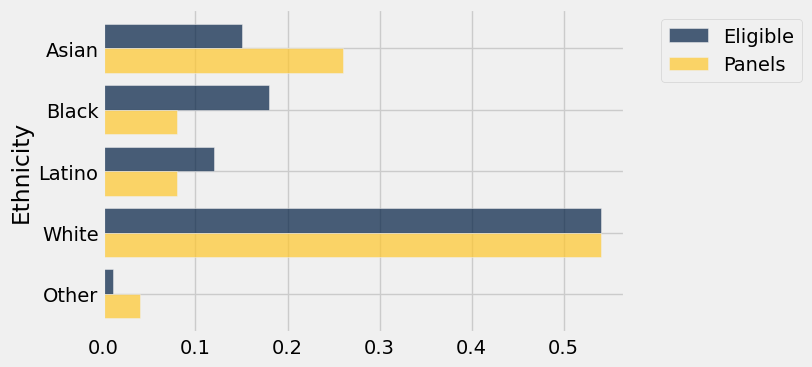

In [6]:
jury.barh('Ethnicity')
plots.show()

Below is the true distribution of people from which the 1453 jurors were randomly sampled.

In [7]:
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [8]:
simulated = sample_proportions(1453, model)
simulated

array([ 0.15347557,  0.17687543,  0.11699931,  0.54232622,  0.01032347])

In [9]:
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.153476
Black,0.18,0.08,0.176875
Latino,0.12,0.08,0.116999
White,0.54,0.54,0.542326
Other,0.01,0.04,0.0103235


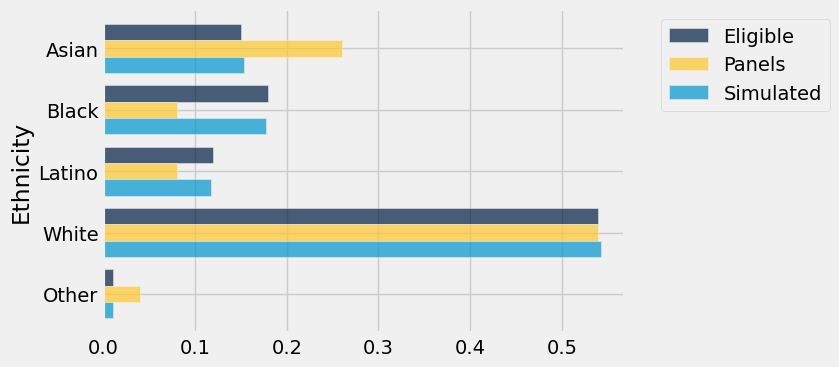

In [12]:
jury_with_simulated.barh('Ethnicity')
plots.show()

### We need a new statistic!

In [13]:
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


**Discussion [1 min]:** How can we best combine/use together the values in the `Difference` column?

In [14]:
sum(jury_with_difference.column('Difference'))

2.7755575615628914e-17

In [15]:
sum(jury_with_difference.where('Difference', are.above(0)).column('Difference'))

0.14000000000000001

In [16]:
sum(abs(jury_with_difference.column('Difference')))/2

0.14000000000000001

### The Total Variation Distance (**TVD**)

In [17]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [18]:
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [19]:
simulated_tvd = tvd(sample_proportions(1453, model), jury.column('Eligible'))
simulated_tvd

0.024514796971782566

In [20]:
def simulated_tvd():
    return tvd(sample_proportions(1453, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

The observed TVD of 0.14 is nowhere close to the simulated TVDs!


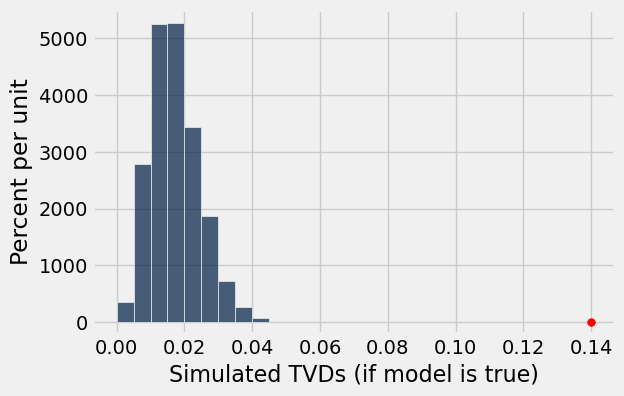

In [21]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('The observed TVD of ' + str(obsvd_tvd) + ' is nowhere close to the simulated TVDs!')

# Plotting details; ignore this code
plots.ylim(-2, 55)
plots.scatter(obsvd_tvd, 0, color='red', s=30)
plots.show();